문제 정의: 도매업 고객(wholesale customers) 데이터 셋을 활용한 군집 분석

기본 라이브러리 불러오기

In [16]:
import pandas
import matplotlib.pyplot as plt

[Step 1] 데이터 준비하기

In [4]:
# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'

df = pandas.read_csv(uci_path, header = 0)

[Step 2] 데이터 탐색

In [5]:
# 데이터 살펴보기
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
# 데이터 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


[Step 3] 데이터 전처리

In [7]:
# 군집 분석은 모든 속성이 X (정답 y는 없음)
X = df.iloc[:,:]  # 전체 데이터 사용
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [9]:
# 데이터 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X[:5])

[[ 1.44865163  0.59066829  0.05293319  0.52356777 -0.04111489 -0.58936716
  -0.04356873 -0.06633906]
 [ 1.44865163  0.59066829 -0.39130197  0.54445767  0.17031835 -0.27013618
   0.08640684  0.08915105]
 [ 1.44865163  0.59066829 -0.44702926  0.40853771 -0.0281571  -0.13753572
   0.13323164  2.24329255]
 [-0.69029709  0.59066829  0.10011141 -0.62401993 -0.3929769   0.6871443
  -0.49858822  0.09341105]
 [ 1.44865163  0.59066829  0.84023948 -0.05239645 -0.07935618  0.17385884
  -0.23191782  1.29934689]]


[Step 4] k-means 군집 모형 - sklearn 사용

In [11]:
# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# 모형 객체 생성 클러스터 개수 5개 지정
kmeans = cluster.KMeans(init = 'k-means++', n_clusters = 5, n_init = 10)

In [12]:
# 모형 학습
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
# 예측 (군집)
cluster_label = kmeans.labels_  # 0~4까지 군집
print(cluster_label)

[2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 0 2 0 2 0 2 0 0 1 2 2 0 0 2 0 0 0 0 0 0 2 0
 2 2 0 0 0 2 2 2 2 2 1 2 2 0 0 2 2 0 0 1 2 0 0 2 1 2 2 0 1 0 2 0 0 0 0 0 2
 2 0 0 2 0 0 0 2 2 0 2 1 1 0 0 0 0 0 1 0 2 0 2 0 0 0 2 2 2 0 0 0 2 2 2 2 0
 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 2 2 0 2 2 2 0 0 2 2 2 2 0 0 0 2 2 0 2 0 2 0 0 0 0 0 1 0 4 0
 0 0 0 2 2 0 0 0 2 0 0 3 2 3 3 2 2 3 3 3 2 3 3 3 2 3 1 3 3 2 3 2 3 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 1 3 3 3 3 3 3 3
 3 3 3 3 3 2 3 2 3 2 3 3 3 3 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 2 3 2
 3 2 2 3 2 2 2 2 2 2 2 3 3 2 3 3 2 3 3 2 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 2 3
 1 3 2 3 3 3 3 2 2 0 2 0 0 2 2 0 2 0 2 0 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0
 2 0 0 2 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 2 2 0 0 0 0 0 0 2 2 0 2 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]


In [14]:
# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2


클러스터 데이터 시각화

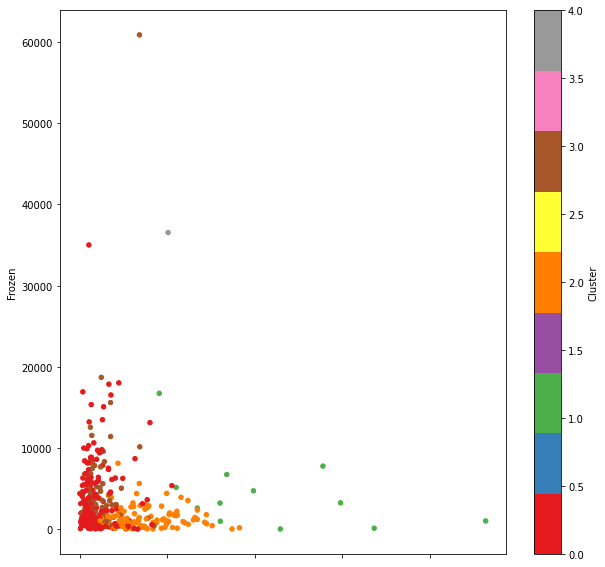

In [19]:
# 그래프로 표현 - 시각화
df.plot(kind = 'scatter', x = 'Grocery', y = 'Frozen', c = 'Cluster', cmap = 'Set1', figsize = (10, 10))
plt.show()

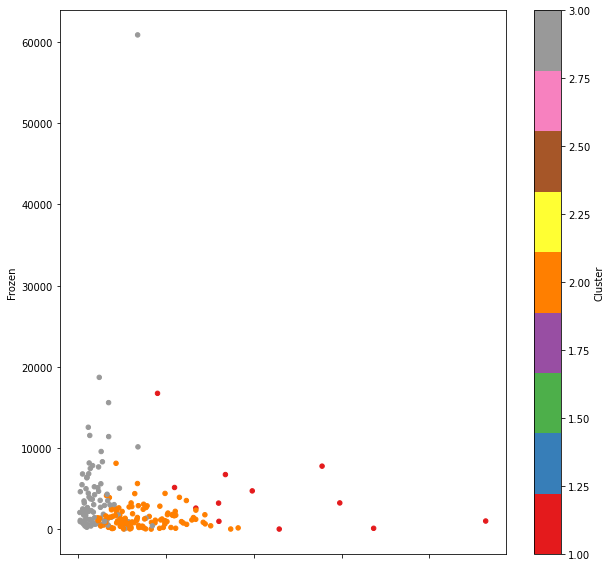

In [20]:
# 큰 값으로 구성된 클러스터(0, 4)를 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask] # ~ -> not !
ndf.plot(kind = 'scatter', x = 'Grocery', y = 'Frozen', c = 'Cluster', cmap = 'Set1', figsize = (10, 10))
plt.show()